In [2]:
import numpy as np
import matplotlib.pyplot as pl

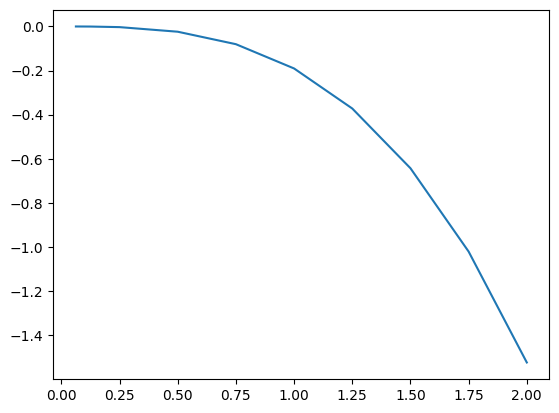

In [64]:
vel = [0.0625, 0.125, 0.25, 0.5, 0.75, 1.0, 1.25, 1.5, 1.75, 2.0]
beta_v = [ -0.0000465869883, -0.00037208, -0.00297619, -0.02380919, -0.08035482, -0.19047034, -0.37201215, -0.64283671, -1.02080042, -1.52375956]

pl.plot(vel, beta_v)

In [65]:
fit = np.polyfit(vel, beta_v, 3, rcond=None, full=False, w=None, cov=False)
fit

array([-1.90469450e-01, -1.06168666e-06,  1.56768043e-07, -1.05309457e-07])

Text(0.5, 0, 'v')

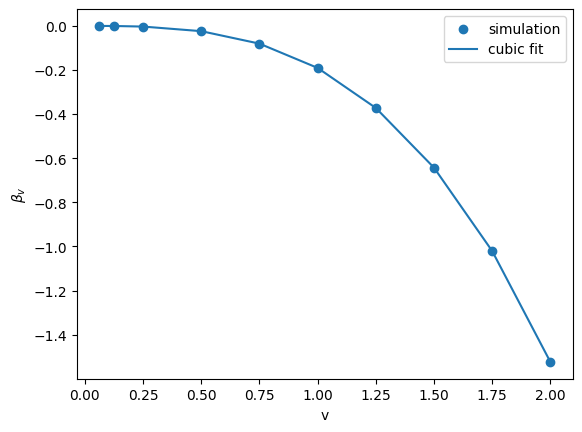

In [95]:
fitted = [fit[0]*x**3 + fit[1]*x**2 + fit[2]*x + fit[3] for x in vel]
pl.scatter(vel, beta_v, label='simulation')
pl.plot(vel, fitted, label='cubic fit')
pl.legend()
pl.ylabel(r'$\beta _v$')
pl.xlabel('v')

In [75]:
TT = [# 2.4e-01, 1.2e+01, 
    3.0e+01, 6.0e+01, 1.2e+02, 1.8e+02, 2.4e+02, 3.6e+02, 4.2e+02, 4.8e+02, 5.4e+02, 6.0e+02]
# bv = [-2.847162369334505, -1.525532690639758, -1.5231944361347873, -1.5233780319408405, -1.5235755500847208, -1.523650448993808, -1.5236889712303892, -1.5237280183612567, -1.523739257395505, -1.5237477035096, -1.523754288699745, -1.5237595630501495]
bv = [# 2.847162369334505, 1.525532690639758, 
    1.5231944361347873, 1.5233780319408405, 1.5235755500847208, 1.523650448993808, 1.5236889712303892, 1.5237280183612567, 1.523739257395505, 1.5237477035096, 1.523754288699745, 1.5237595630501495]

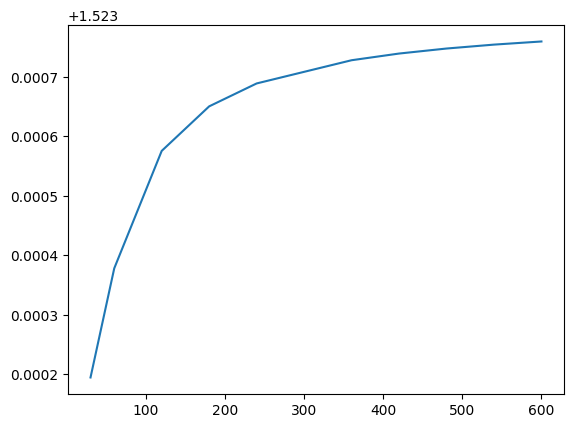

In [76]:
pl.plot(TT, bv)

In [77]:
inverted_TT = [1/t for t in TT]
inverted_TT

[0.03333333333333333,
 0.016666666666666666,
 0.008333333333333333,
 0.005555555555555556,
 0.004166666666666667,
 0.002777777777777778,
 0.002380952380952381,
 0.0020833333333333333,
 0.001851851851851852,
 0.0016666666666666668]

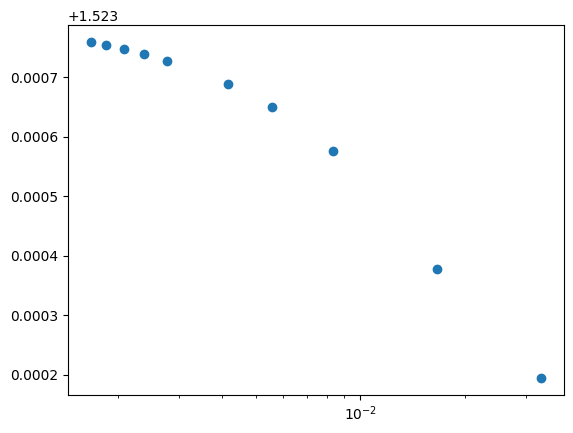

In [88]:
pl.scatter(inverted_TT, bv)
pl.xscale('log')
# pl.yscale('log')
# pl.xlim(0, 1)
# pl.ylim(1, 10)

In [103]:
fit2 = np.polyfit(inverted_TT, bv, 2, rcond=None, full=False, w=None, cov=False)
print(fit2)
def f(h):
    return fit2[0]*h**2 + fit2[1]*h + fit2[2]

[ 0.43471945 -0.03319051  1.52381669]


Text(0.5, 0, '1/Tmax')

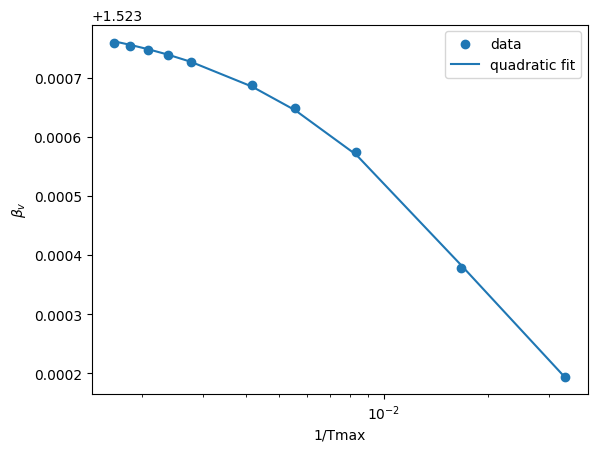

In [104]:
fitted2 = [f(x) for x in inverted_TT]
pl.scatter(inverted_TT, bv, label='data')
pl.plot(inverted_TT, fitted2, label='quadratic fit')
pl.legend()
pl.xscale('log')
pl.ylabel(r'$\beta _v$')
pl.xlabel('1/Tmax')

In [106]:
h = 1/TT[-1]
print(h)

0.0016666666666666668


In [ ]:
A_opti = 0
A_init = f(h)
k = 3
while np.abs(A_opti - A_init) > 0.0001:
    A_init = f(h)
    A_opti = 2**k * f(h/2) 